In [20]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.patches import Patch
from astropy.io import fits

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (8, 8)
fontSize = 20

### KiDS-1000 Samples

In [122]:
!pwd

/home/harry/Github/emuK1K/analysis


In [22]:
# load the fits file
data_tables = fits.open('data/kids_1000.fits')

# extract the n(z) distribution
nofz = data_tables['NZ_SOURCE'].data

# get the redshifts
redshifts = np.concatenate((np.zeros(1), nofz['Z_MID']))

# heights for the n(z) distribution
heights = []

for zbin in range(5):

    hist_pz = nofz['BIN{:}'.format(zbin + 1)]

    heights += [np.concatenate((np.zeros(1), hist_pz))]

heights = np.asarray(heights)

In [36]:
norm_0 = np.trapz(heights[0], redshifts)
norm_1 = np.trapz(heights[1], redshifts)
norm_2 = np.trapz(heights[2], redshifts)
norm_3 = np.trapz(heights[3], redshifts)
norm_4 = np.trapz(heights[4], redshifts)

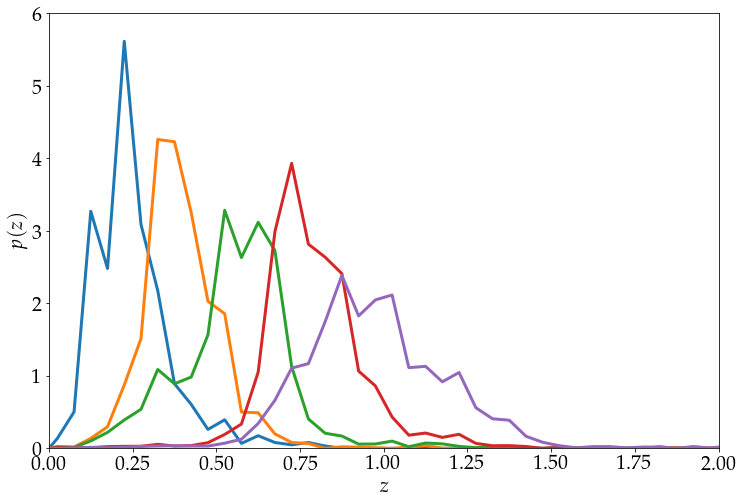

In [41]:
plt.figure(figsize=(12,8))
plt.plot(redshifts, heights[0]/norm_0, lw = 3)
plt.plot(redshifts, heights[1]/norm_1, lw = 3)
plt.plot(redshifts, heights[2]/norm_2, lw = 3)
plt.plot(redshifts, heights[3]/norm_3, lw = 3)
plt.plot(redshifts, heights[4]/norm_4, lw = 3)
plt.ylabel(r'$p(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0.0, 2.0)
plt.ylim(0.0, 6.0)
# plt.savefig('plots/distributions_som_kids_1000.pdf', bbox_inches = 'tight')
plt.show()

### Load the Samples

In [3]:
samples_1 = np.loadtxt('data/george/Nz_Bootstrap/Nz_z0.1t0.3.asc')
samples_2 = np.loadtxt('data/george/Nz_Bootstrap/Nz_z0.3t0.5.asc')
samples_3 = np.loadtxt('data/george/Nz_Bootstrap/Nz_z0.5t0.7.asc')
samples_4 = np.loadtxt('data/george/Nz_Bootstrap/Nz_z0.7t0.9.asc')
samples_5 = np.loadtxt('data/george/Nz_Bootstrap/Nz_z0.9t1.2.asc')

### Calculate Means and Standard Deviations

In [42]:
mu_1 = np.mean(samples_1[:,1:], axis = 1)
mu_2 = np.mean(samples_2[:,1:], axis = 1)
mu_3 = np.mean(samples_3[:,1:], axis = 1)
mu_4 = np.mean(samples_4[:,1:], axis = 1)
mu_5 = np.mean(samples_5[:,1:], axis = 1)

In [43]:
sd_1 = np.std(samples_1[:,1:], axis = 1)
sd_2 = np.std(samples_2[:,1:], axis = 1)
sd_3 = np.std(samples_3[:,1:], axis = 1)
sd_4 = np.std(samples_4[:,1:], axis = 1)
sd_5 = np.std(samples_5[:,1:], axis = 1)

In [44]:
y_pos = np.arange(len(mu_1))
y_pos_mod = np.arange(0, len(mu_1)+2, 10)

# the redshift is the same for all
red = samples_1[:,0]
red_mod = np.arange(0, 3.5, 0.5)# red[::10]-0.025

### Generate The Plot

In [45]:
legend_elements = [Patch(fill=False, edgecolor='salmon', label='Redshift Distribution 1'),
                  Patch(fill=False, edgecolor='skyblue', label='Redshift Distribution 2'),
                  Patch(fill=False, edgecolor='yellowgreen', label='Redshift Distribution 3'),
                  Patch(fill=False, edgecolor='silver', label='Redshift Distribution 4'),
                  Patch(fill=False, edgecolor='plum', label='Redshift Distribution 5')]

In [46]:
ymax = 4
xmax = 61

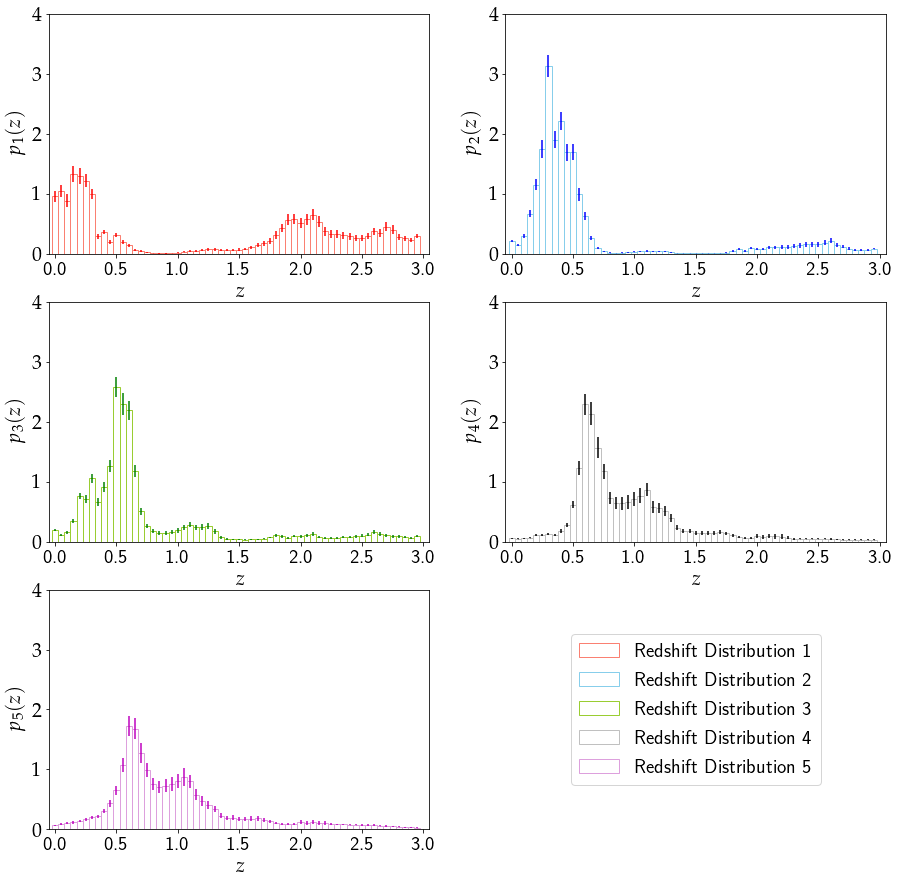

In [47]:
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
plt.bar(y_pos, mu_1, width=1, edgecolor='salmon', fill=False)
plt.errorbar(y_pos, mu_1, yerr = sd_1, fmt = 'ro', ms = 0.1)
plt.ylabel(r'$p_{1}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,xmax)
plt.ylim(0.0, ymax)

plt.subplot(3,2,2)
plt.bar(y_pos, mu_2, width=1, edgecolor='skyblue', fill=False)
plt.errorbar(y_pos, mu_2, yerr = sd_2, fmt = 'bo', ms = 0.1)
plt.ylabel(r'$p_{2}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,xmax)
plt.ylim(0.0, ymax)

plt.subplot(3,2,3)
plt.bar(y_pos, mu_3, width=1, edgecolor='yellowgreen', fill=False)
plt.errorbar(y_pos, mu_3, yerr = sd_3, fmt = 'go', ms = 0.1)
plt.ylabel(r'$p_{3}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,xmax)
plt.ylim(0.0, ymax)

plt.subplot(3,2,4)
plt.bar(y_pos, mu_4, width=1, edgecolor='silver', fill=False)
plt.errorbar(y_pos, mu_4, yerr = sd_4, fmt = 'ko', ms = 0.1)
plt.ylabel(r'$p_{4}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,xmax)
plt.ylim(0.0, ymax)

plt.subplot(3,2,5)
plt.bar(y_pos, mu_5, width=1, edgecolor='plum', fill=False)
plt.errorbar(y_pos, mu_5, yerr = sd_5, fmt = 'mo', ms = 0.1)
plt.ylabel(r'$p_{5}(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xticks(y_pos_mod, red_mod, fontsize=fontSize)
plt.xlim(-1,xmax)
plt.ylim(0.0, ymax)

plt.subplot(3,2,6)
plt.legend(handles=legend_elements, loc='center',prop={'family':'sans-serif', 'size':20})
plt.axis('off')

# plt.savefig('plots/distributions_set_george_kids_1000.pdf', bbox_inches = 'tight')
plt.show()

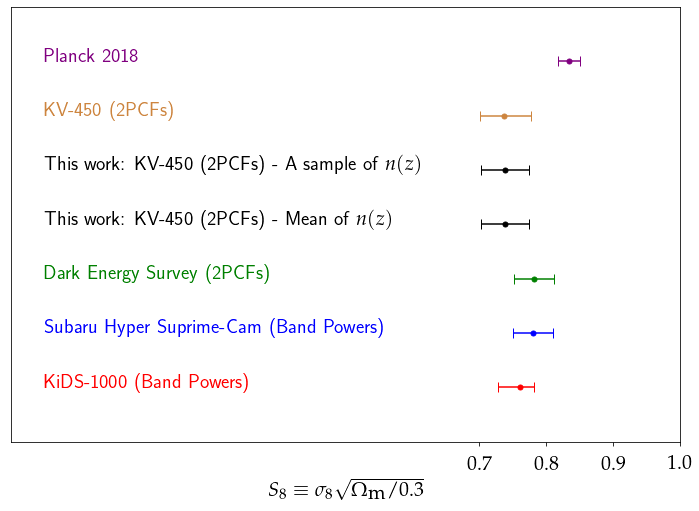

In [121]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis([0, 1, 0.5, 4.5])

# KiDS-1000
ax.errorbar(0.761, 1.0, xerr = np.array([[0.033, 0.021]]).T, fmt = 'ro', markersize = 5, capsize=5)
ax.text(0.05, 1.0, 'KiDS-1000 (Band Powers)', size=fontSize, color='red')

# HSC
ax.errorbar(0.780, 1.5, xerr = np.array([[0.030, 0.030]]).T, fmt = 'bo', markersize = 5, capsize=5)
ax.text(0.05, 1.5, 'Subaru Hyper Suprime-Cam (Band Powers)', size=fontSize, color='blue')

# DES
ax.errorbar(0.782, 2.0, xerr = np.array([[0.030, 0.030]]).T, fmt = 'go', markersize = 5, capsize=5)
ax.text(0.05, 2.0, 'Dark Energy Survey (2PCFs)', size=fontSize, color='green')

# this work
ax.errorbar(0.738, 2.5, xerr = np.array([[0.035, 0.036]]).T, fmt = 'ko', markersize = 5, capsize=5)
ax.text(0.05, 2.5, 'This work: KV-450 (2PCFs) - Mean of $n(z)$', size=fontSize, color='black')

# this work
ax.errorbar(0.738, 3.0, xerr = np.array([[0.035, 0.036]]).T, fmt = 'ko', markersize = 5, capsize=5)
ax.text(0.05, 3.0, 'This work: KV-450 (2PCFs) - A sample of $n(z)$', size=fontSize, color='black')

# KV-450
ax.errorbar(0.737, 3.5, xerr = np.array([[0.036, 0.040]]).T, fmt = 'o', markersize = 5, capsize=5, color = 'peru')
ax.text(0.05, 3.5, 'KV-450 (2PCFs)', size=fontSize, color='peru')

# Planck
ax.errorbar(0.834, 4., xerr = np.array([[0.016, 0.016]]).T, fmt = 'o', markersize = 5, capsize=5, color = 'purple')
ax.text(0.05, 4., 'Planck 2018', size=fontSize, color='purple')

ax.set_yticks([])
ax.set_xticks([0.7, 0.8, 0.9, 1.0])
ax.set_xlabel(r'$S_{8}\equiv\sigma_{8}\sqrt{\Omega_{\textrm{m}}/0.3}$', fontsize = fontSize, labelpad=10)
ax.tick_params(axis='x', labelsize=fontSize, pad = 10)

# plt.savefig('plots/tensions.pdf', bbox_inches = 'tight')
plt.show()